<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Libraries </p>
     </b>
</h1>


In [1]:
pip install plottable

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import time
from plottable import Table, ColumnDefinition as ColDef
from matplotlib.patches import Rectangle

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

from plottable import ColumnDefinition as ColDef, Table 


<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Loading Data </p>
     </b>
</h1>

In [3]:
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Understand the Data </p>
     </b>
</h1>

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

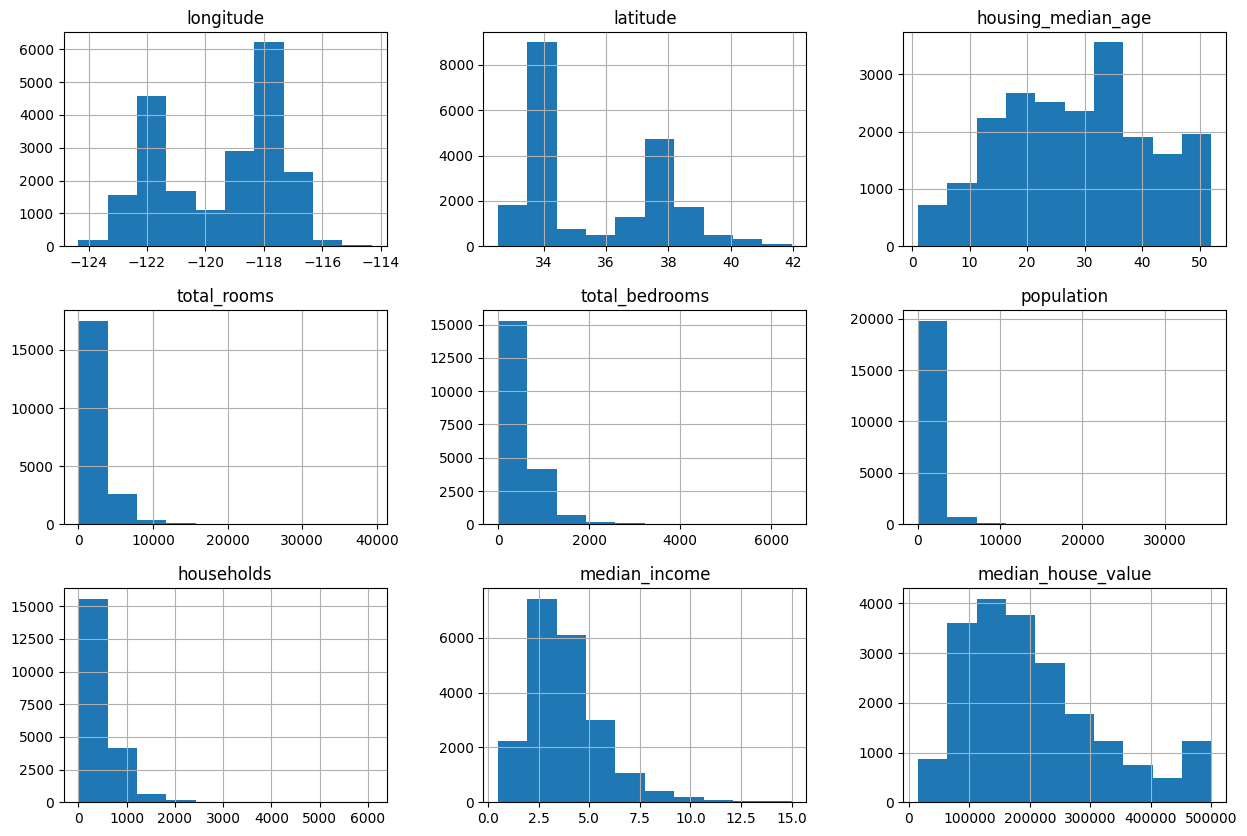

In [6]:
df.hist(figsize=(15,10))

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Feature Enginering </p>
     </b>
</h1>

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)

In [9]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
df= pd.concat([df.drop('ocean_proximity', axis=1), pd.get_dummies(df['ocean_proximity']).add_prefix('ocean_proximity_')], axis=1 )
#mapping = {'<1H OCEAN': 1,'INLAND': 2,'NEAR OCEAN': 3,'NEAR BAY':4,'ISLAND':5}
#df['ocean_proximity'] = df['ocean_proximity'].map(mapping)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  206

In [13]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Basic Correlation </p>
     </b>
</h1>

<Axes: >

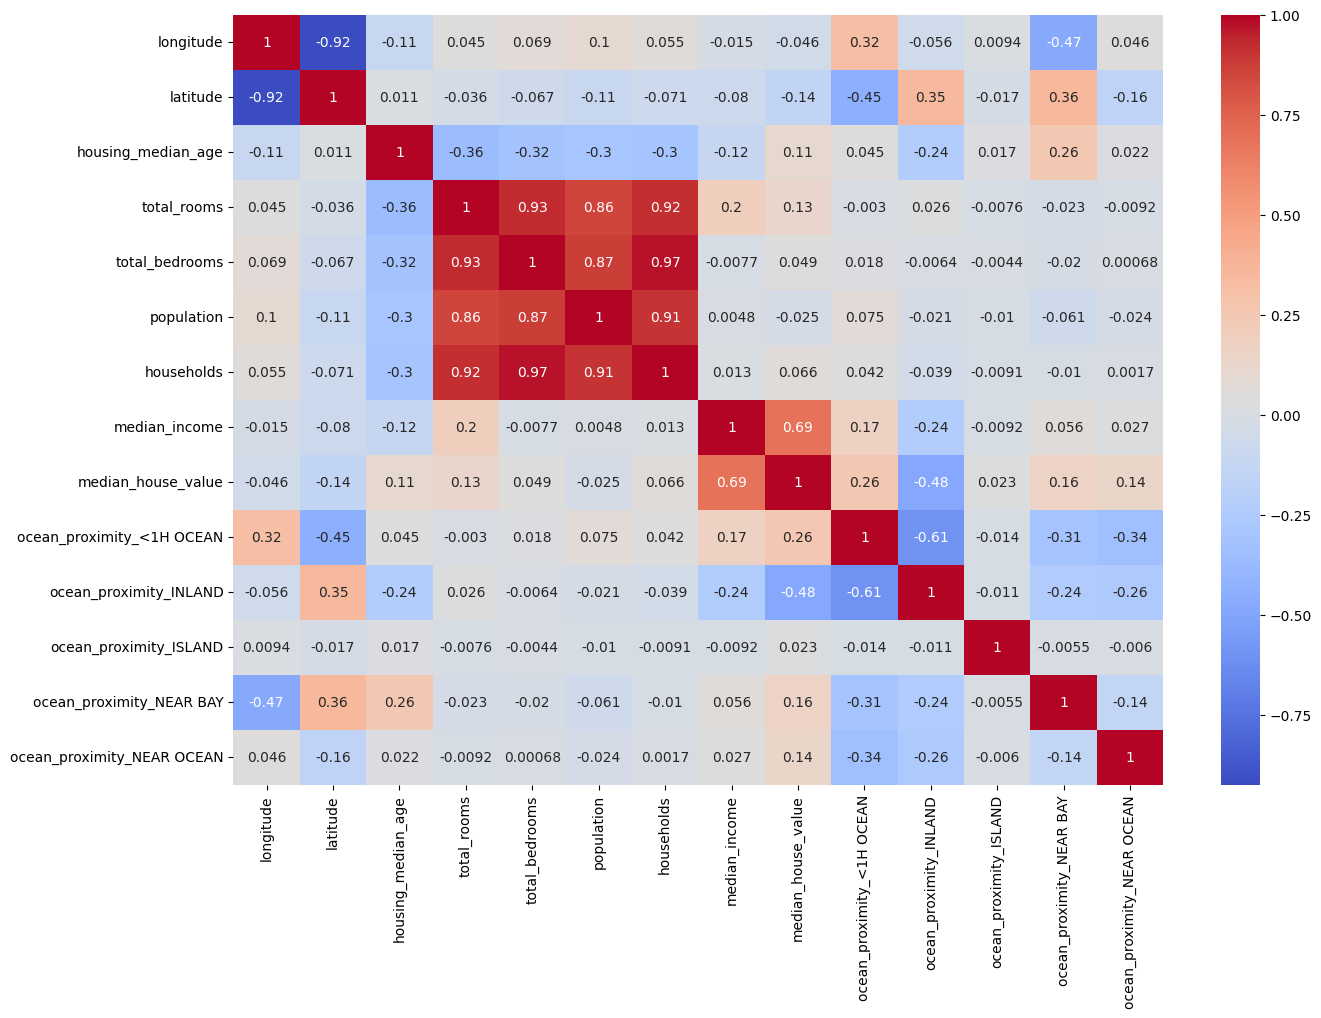

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

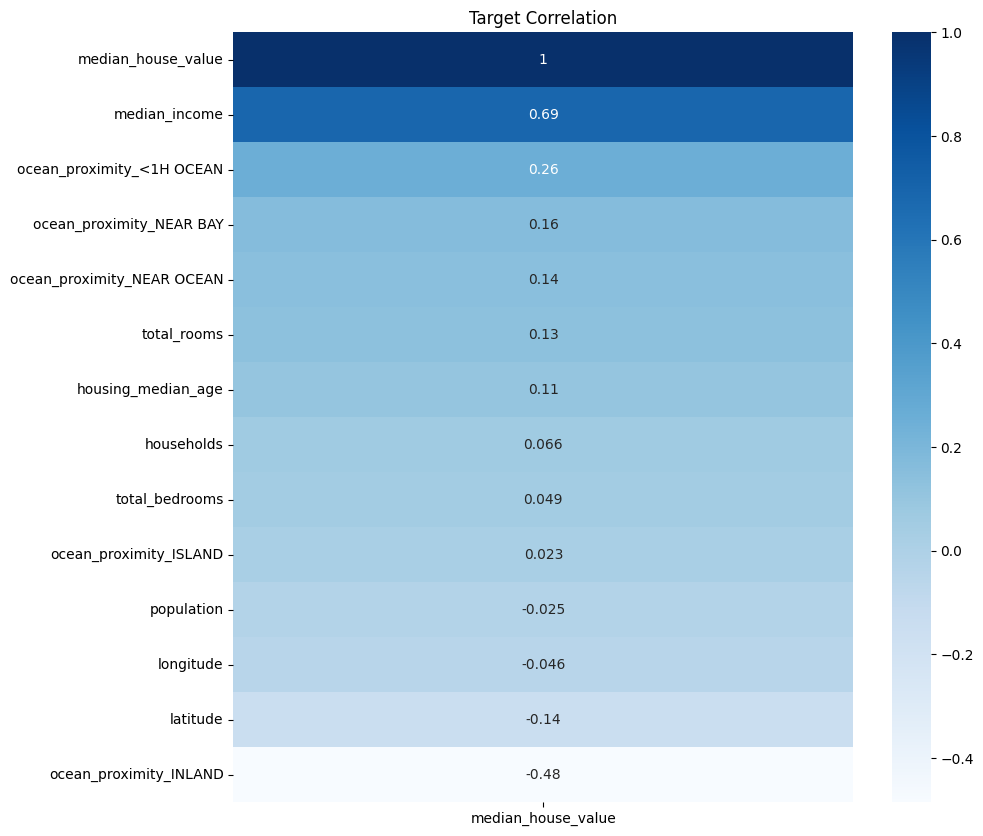

In [15]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr()[['median_house_value']].sort_values(by='median_house_value', ascending=False), annot = True, cmap = 'Blues')
plt.title('Target Correlation')
plt.show()

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Data Visualization </p>
     </b>
</h1>

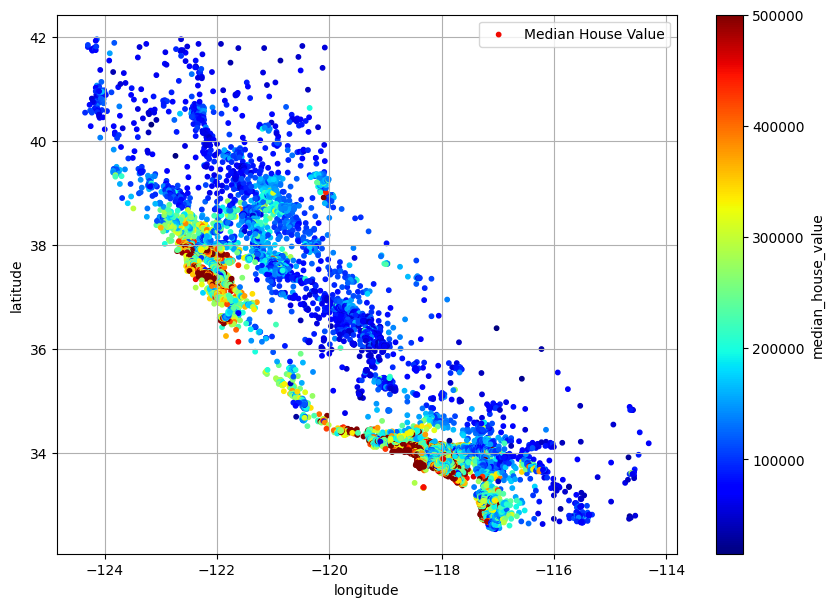

In [16]:
df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    grid=True,
    s= 10,  # Constant point Size
    c="median_house_value",
    label="Median House Value",
    cmap="jet",
    colorbar=True,
    figsize=(10, 7)
)

plt.show()


In [17]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude",
                        color="median_house_value", size="median_house_value",
                        color_continuous_scale="jet",
                        range_color=(0, df['median_house_value'].max()),
                        zoom=5, height=700)
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=5, mapbox_center={"lat": 37.5, "lon": -119.5})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Modeling </p>
     </b>
</h1>

<h2>
    <b>
        <span style="color:#E67E22">
            Metrics
        </span>
    </b>
</h2>

In [18]:
scores = []
def Results(model_name,rmse, train_score, test_score):  
    scores.append({
                'Model': model_name,
                'RMSE': rmse,
                'Test_Score': test_score,      
                'Train_Score' : train_score,
            })


<h2>
    <b>
        <span style="color:#E67E22">
            Predictor Variables & Target Variable
        </span>
    </b>
</h2>

In [19]:
X = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

<h2>
    <b>
        <span style="color:#E67E22">
            Normalization
        </span>
    </b>
</h2>

In [20]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2>
    <b>
        <span style="color:#E67E22">
            Linear Regression Modeling - Default Parameters
        </span>
    </b>
</h2>

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
Results('Linear Regression',rmse, train_score, test_score)

<h2>
    <b>
        <span style="color:#E67E22">
            Random Forest Regression Modeling - Default Parameters
        </span>
    </b>
</h2>

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
y_pred = forest.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
train_score = forest.score(X_train, y_train)
test_score = forest.score(X_test, y_test)
Results('Random Forest Regressor',rmse, train_score, test_score)

<h2>
    <b>
        <span style="color:#E67E22">
            Decission Tree Regression Modeling - Default Parameters
        </span>
    </b>
</h2>

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [29]:
y_pred = dtr.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
train_score = dtr.score(X_train, y_train)
test_score = dtr.score(X_test, y_test)
Results('Decision Tree Regressor',rmse, train_score, test_score)

<h2>
    <b>
        <span style="color:#E67E22">
            Ridge Modeling - Default Parameters
        </span>
    </b>
</h2>

In [30]:
from sklearn.linear_model import Ridge

In [31]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [32]:
y_pred = ridge.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)
Results('Ridge',rmse, train_score, test_score)

<h2>
    <b>
        <span style="color:#E67E22">
            LGBM Regression Modeling - Default Parameters
        </span>
    </b>
</h2>

In [33]:
from lightgbm import LGBMRegressor


In [34]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)

LGBMRegressor()

In [35]:
y_pred = lgb.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
train_score = lgb.score(X_train, y_train)
test_score = lgb.score(X_test, y_test)
Results('LGBMRegressor',rmse, train_score, test_score)

<h2>
    <b>
        <span style="color:#E67E22">
            XGB Regression Modeling - Default Parameters
        </span>
    </b>
</h2>

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
y_pred = xgb.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
train_score = xgb.score(X_train, y_train)
test_score = xgb.score(X_test, y_test)
Results('XGBRegressor',rmse, train_score, test_score)


<h2>
    <b>
        <span style="color:#E67E22">
            Results Modeling - Default Parameters
        </span>
    </b>
</h2>

In [39]:
scores


[{'Model': 'Linear Regression',
  'RMSE': 68949.62451074278,
  'Test_Score': 0.6375631694383719,
  'Train_Score': 0.6471768442653696},
 {'Model': 'Random Forest Regressor',
  'RMSE': 48944.503372597785,
  'Test_Score': 0.8173682143053402,
  'Train_Score': 0.9750774121773358},
 {'Model': 'Decision Tree Regressor',
  'RMSE': 69555.27666822213,
  'Test_Score': 0.6311679283164076,
  'Train_Score': 1.0},
 {'Model': 'Ridge',
  'RMSE': 68949.23714472415,
  'Test_Score': 0.6375672418410478,
  'Train_Score': 0.6471767781142871},
 {'Model': 'LGBMRegressor',
  'RMSE': 47493.681844013525,
  'Test_Score': 0.8280349499905517,
  'Train_Score': 0.8752398607066466},
 {'Model': 'XGBRegressor',
  'RMSE': 47393.15301807576,
  'Test_Score': 0.8287621687671755,
  'Train_Score': 0.9379931126255763}]

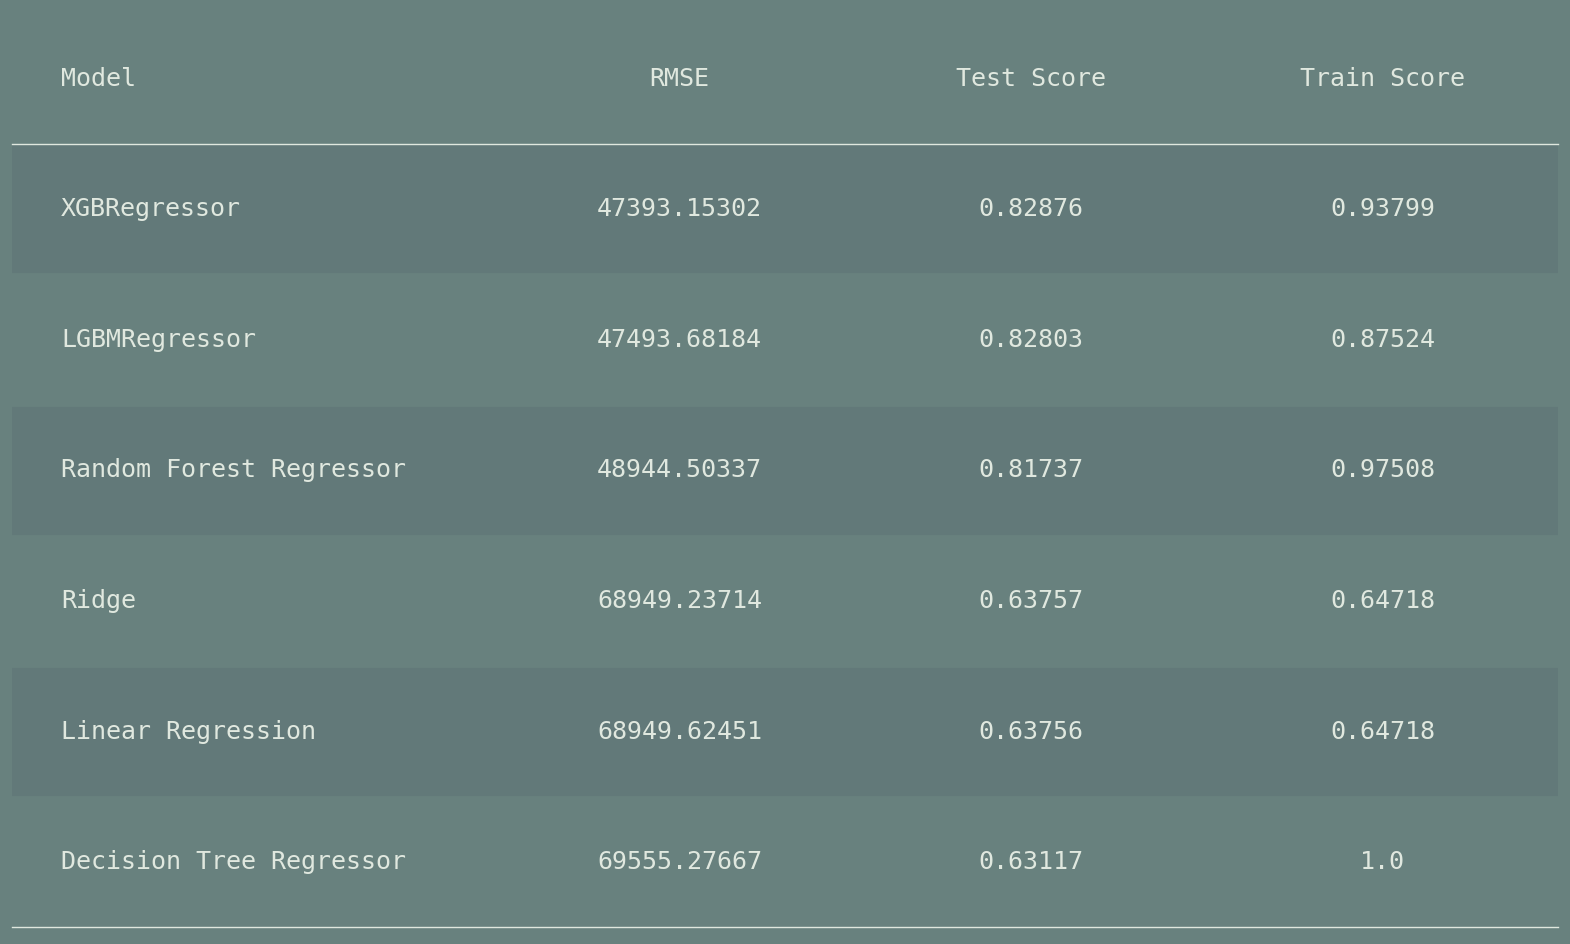

In [40]:
df_scores = pd.DataFrame(scores).sort_values(by=['RMSE', 'Test_Score'], ascending=[True, False])
df_scores = df_scores[['Model','RMSE', 'Test_Score','Train_Score']].round(5)

row_colors = {
    "even": "#627979",
    "odd": "#68817e",
}

bg_color = row_colors["odd"]
text_color = "#e0e8df"

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

table_col_defs = [
    ColDef("Model", width=7, title="Model", textprops={"ha": "left"}),
    ColDef("RMSE", width=5, title="RMSE", textprops={"ha": "center"}),
    ColDef("Test_Score", width=5, title="Test Score", textprops={"ha": "center"}),
    ColDef("Train_Score", width=5, title="Train Score", textprops={"ha": "center"}),
]

fig, ax = plt.subplots(figsize=(20, 12))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color) 


table = Table(
    df_scores,
    column_definitions=table_col_defs,
    index_col="Model",
    textprops={"fontsize": 18, "ha": "center"},
    row_dividers = True,
    footer_divider=True,
    row_divider_kw={"color": bg_color, "lw": 2},
    even_row_color=row_colors["even"],
    column_border_kw={"color": bg_color, "lw": 2},
    ax=ax
)
plt.show()

<h2>
    <b>
        <span style="color:#E67E22">
            Grid Searching Best Parameters for Modeling
        </span>
    </b>
</h2>

In [41]:
def find_best_model(X_train, y_train, model, param_grid):
    cv = 5  # Cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', return_train_score=False)
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    elapsed_time = end_time - start_time
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    return best_model,elapsed_time, best_params

def evaluate_model(model, X_train, y_train, X_test, y_test):
    
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    return rmse, train_score, test_score, elapsed_time, mae, mse,r2 

def find_best_model_and_evaluate(X_train, y_train, X_test, y_test, model, param_grid):
    # Looking for best model
    best_model, search_time, best_params = find_best_model(X_train, y_train, model, param_grid)
    
    # Evaluating model
    rmse, train_score, test_score,evaluation_time, mae, mse,r2   = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    
    return rmse, train_score, test_score, search_time,evaluation_time, best_params, mae, mse,r2  


def mods(X_train, y_train, X_test, y_test):
    best_param = []
    results_list = []
    models = {
        'Decision Tree Regressor': {
            'model': DecisionTreeRegressor(),
            'param_grid': {
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['sqrt', 'log2']
            }
        },
        'Ridge Regressor': {
            'model': Ridge(),
            'param_grid': {
                'alpha': [0.1, 0.5, 1.0, 10.0]
            }
        },
        'Linear Regression': {
            'model': LinearRegression(),
            'param_grid': {
                'fit_intercept': [True, False]
            }
        },
        'Random Forest Regressor': {
            'model': RandomForestRegressor(),
            'param_grid': {
                'n_estimators': [10, 20, 30],
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': [ 'sqrt', 'log2']
            }
        },
       'XGB Regressor': {
            'model': XGBRegressor(),
            'param_grid': {
                'n_estimators': [50, 100, 150],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]
            }
        },
        'LightGBM Regressor': {
            'model': LGBMRegressor(),
            'param_grid': {
                'n_estimators': [50, 100, 150],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]
            }
        }
    }
  
    
    for model_name, config in models.items():
        rmse, train_score, test_score, search_time, evaluation_time,best_params, mae, mse,r2 = find_best_model_and_evaluate(X_train, y_train, X_test, y_test, config['model'], config['param_grid'])
     
        
        results_list.append({
            'Model': model_name,
            'RMSE ($)': rmse,
            'R²': r2,
            'MAE': mae,
            'MSE' : mse,
            'Evaluation Time (sec)': evaluation_time,
            'Grid Search Time (sec)' : search_time,
            'Test Score': test_score,
            'Train Score': train_score,         
            'Best Param.': best_params,
        })
    return results_list

     
results_list = mods(X_train, y_train, X_test, y_test)

results_df = pd.DataFrame(results_list)


In [42]:
res_df=results_df

<h2>
    <b>
        <span style="color:#E67E22">
            Comparing Results between Models
        </span>
    </b>
</h2>

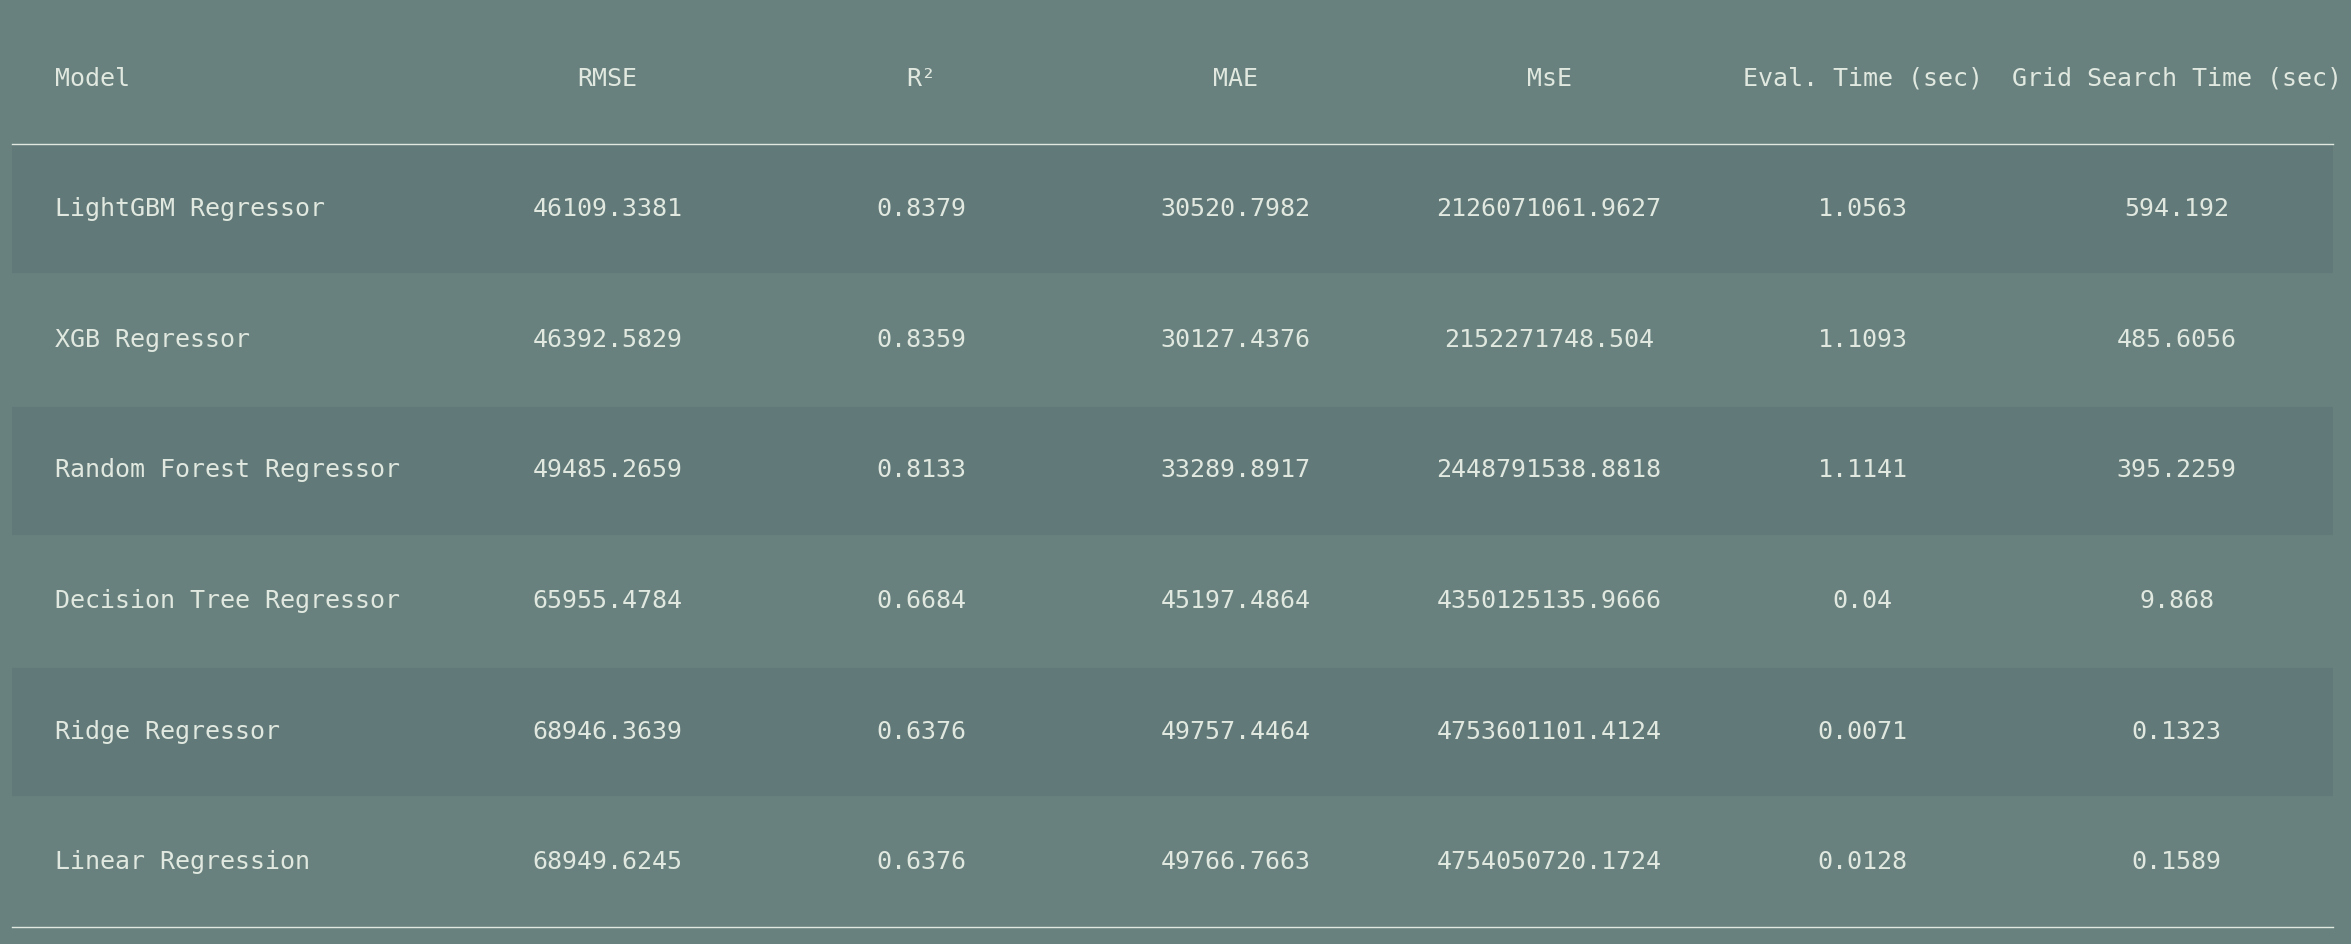

In [43]:
results_df = results_df.sort_values(by=['RMSE ($)', 'R²', 'MAE', 'MSE', 'Evaluation Time (sec)', 'Grid Search Time (sec)'], ascending=[True, False, False, False, False, False]).round(4)

results_df = results_df[['Model' , 'RMSE ($)', 'R²', 'MAE', 'MSE', 'Evaluation Time (sec)', 'Grid Search Time (sec)']]

row_colors = {
    "even": "#627979",
    "odd": "#68817e",
}

bg_color = row_colors["odd"]
text_color = "#e0e8df"

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

table_col_defs = [
    ColDef("Model", width=7, title="Model", textprops={"ha": "left"}),
    ColDef("RMSE ($)", width=5, title="RMSE", textprops={"ha": "center"}),
    ColDef("R²", width=5, title="R²", textprops={"ha": "center"}),
    ColDef("MAE", width=5, title="MAE", textprops={"ha": "center"}),
    ColDef("MSE", width=5, title="MsE", textprops={"ha": "center"}),
    ColDef("Evaluation Time (sec)", width=5, title="Eval. Time (sec)", textprops={"ha": "center"}),
    ColDef("Grid Search Time (sec)", width=5, title="Grid Search Time (sec)", textprops={"ha": "center"}),
]

fig, ax = plt.subplots(figsize=(30, 12))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color) 


table = Table(
    results_df,
    column_definitions=table_col_defs,
    index_col="Model",
    textprops={"fontsize": 18, "ha": "center"},
    row_dividers = True,
    footer_divider=True,
    row_divider_kw={"color": bg_color, "lw": 2},
    even_row_color=row_colors["even"],
    column_border_kw={"color": bg_color, "lw": 2},
    ax=ax
)
plt.show()

<h2>
    <b>
        <span style="color:#E67E22">
            Selecting Model
        </span>
    </b>
</h2>

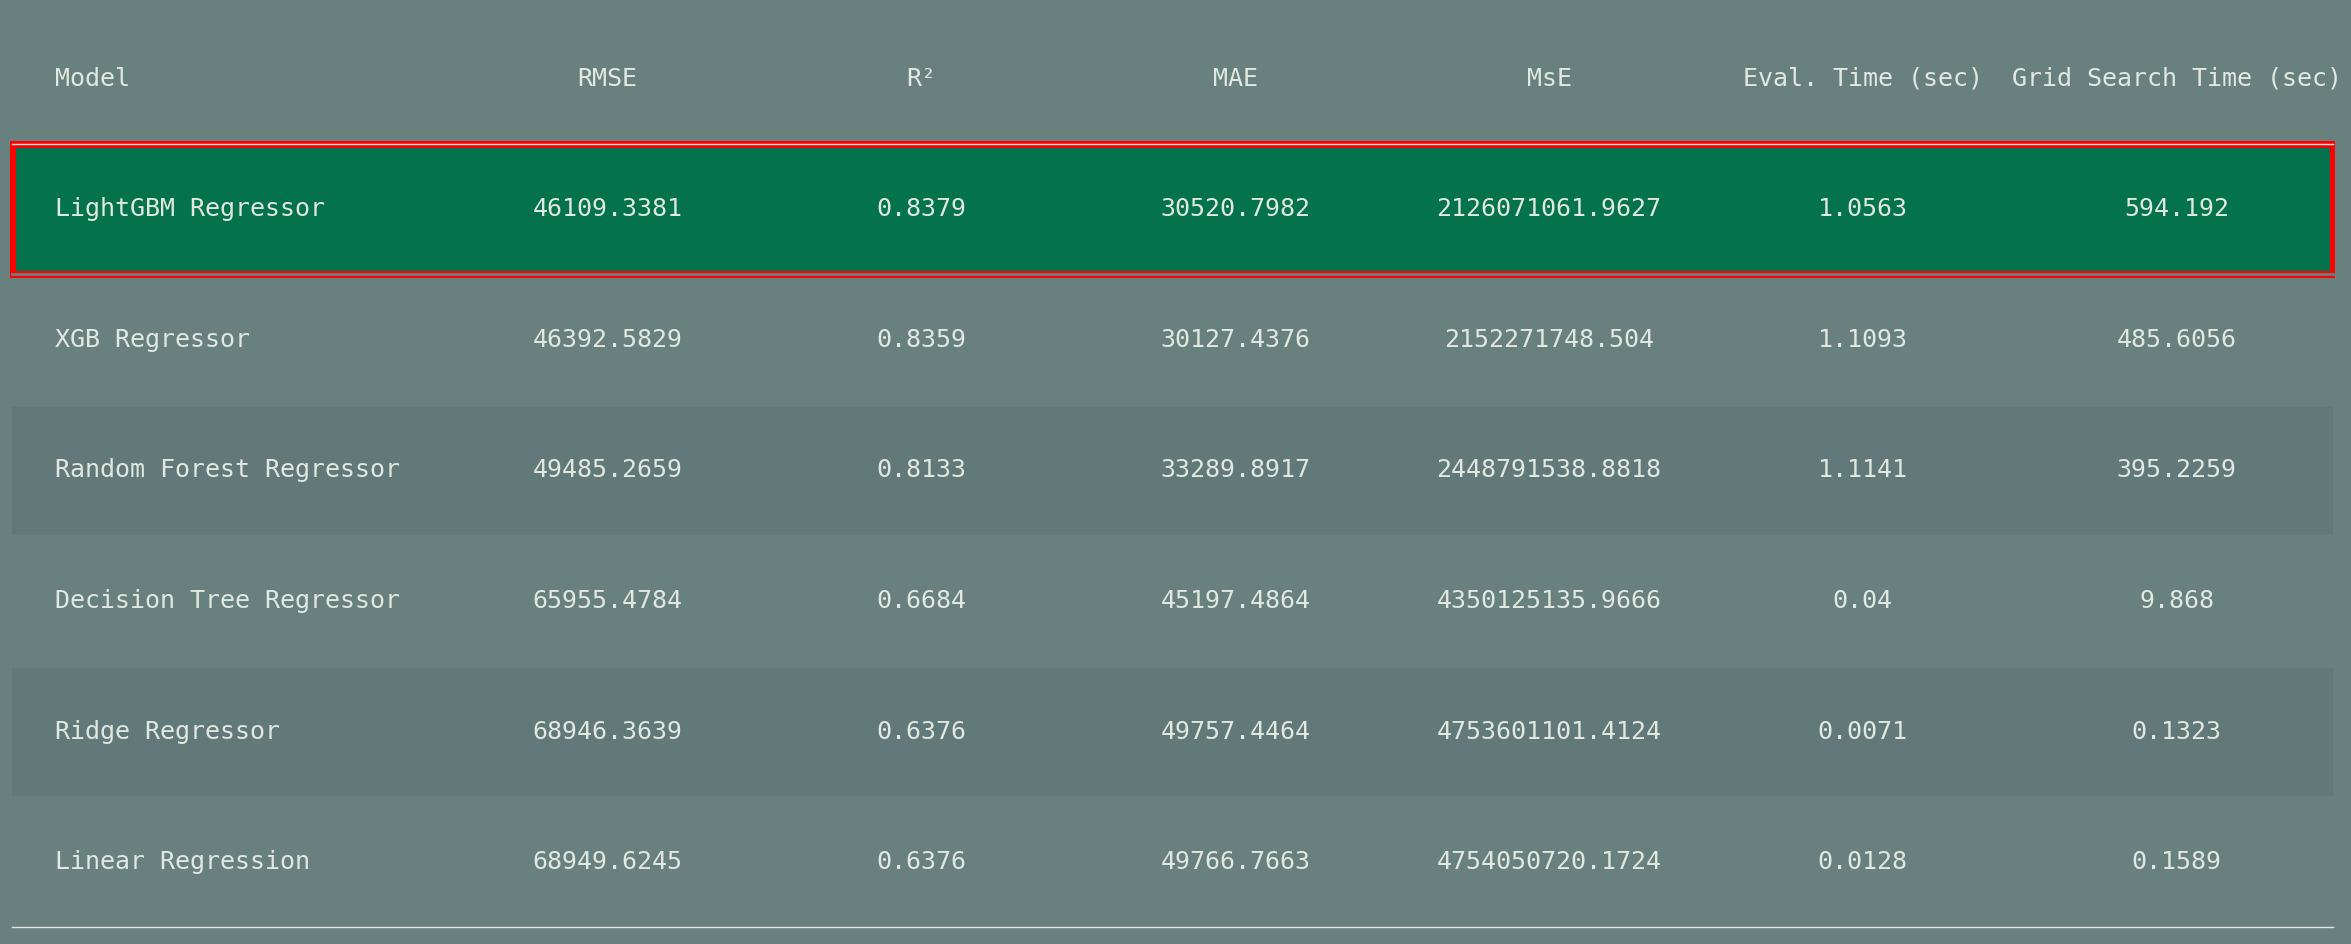

In [44]:
results_df = results_df.sort_values(by=['RMSE ($)', 'R²', 'MAE', 'MSE', 'Evaluation Time (sec)', 'Grid Search Time (sec)'], ascending=[True, False, False, False, False, False]).round(4)
results_df = results_df[['Model' , 'RMSE ($)', 'R²', 'MAE', 'MSE', 'Evaluation Time (sec)', 'Grid Search Time (sec)']]

row_colors = {"even": "#627979", "odd": "#68817e"}
bg_color = row_colors["odd"]
text_color = "#e0e8df"
plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

table_col_defs = [
    ColDef("Model", width=7, title="Model", textprops={"ha": "left"}),
    ColDef("RMSE ($)", width=5, title="RMSE", textprops={"ha": "center"}),
    ColDef("R²", width=5, title="R²", textprops={"ha": "center"}),
    ColDef("MAE", width=5, title="MAE", textprops={"ha": "center"}),
    ColDef("MSE", width=5, title="MsE", textprops={"ha": "center"}),
    ColDef("Evaluation Time (sec)", width=5, title="Eval. Time (sec)", textprops={"ha": "center"}),
    ColDef("Grid Search Time (sec)", width=5, title="Grid Search Time (sec)", textprops={"ha": "center"}),
]

fig, ax = plt.subplots(figsize=(30, 12))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color) 


table = Table(
    results_df,
    column_definitions=table_col_defs,
    index_col="Model",
    textprops={"fontsize": 18, "ha": "center"},
    row_dividers=True,
    footer_divider=True,
    row_divider_kw={"color": bg_color, "lw": 2},
    even_row_color=row_colors["even"],
    column_border_kw={"color": bg_color, "lw": 2},
    ax=ax
)

selected_model_position = 0  

table.rows[selected_model_position].set_facecolor("#04724d")
rect = Rectangle((0, selected_model_position ), 37, 1, linewidth=5, edgecolor='red', facecolor='none')
ax.add_patch(rect)

plt.show()


In [45]:
model_name = "LightGBM Regressor"
row = res_df[res_df['Model'] == model_name]

if not row.empty:
    best_params_dict = row['Best Param.'].iloc[0]

    # Crear una instancia de LGBMRegressor con los parámetros óptimos
    lgb = LGBMRegressor(**best_params_dict)
    lgb.fit(X_train, y_train)
    y_pred = lgb.predict(X_test)
    print(f"Model {model_name} created with best parameters.")
else:
    print(f"Model not found: {model_name} into DataFrame.")

Model LightGBM Regressor created with best parameters.


In [46]:
best_params_dict

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 7,
 'n_estimators': 150,
 'subsample': 0.8}

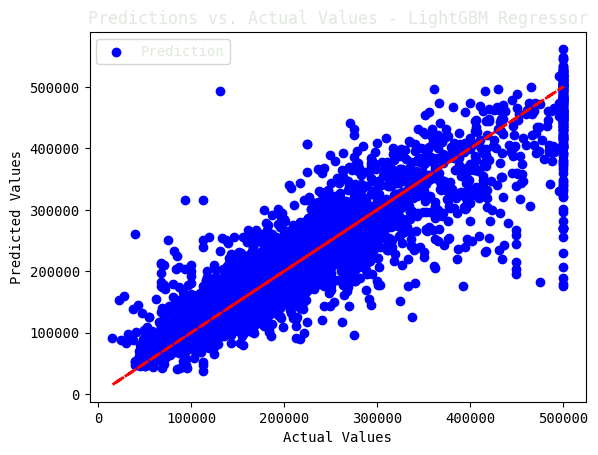

In [47]:
plt.scatter(y_test, y_pred, color='blue', label='Prediction')
plt.plot(y_test, y_test, linestyle='--', color='red', linewidth=2 )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Actual Values - LightGBM Regressor')
plt.legend()
plt.show()

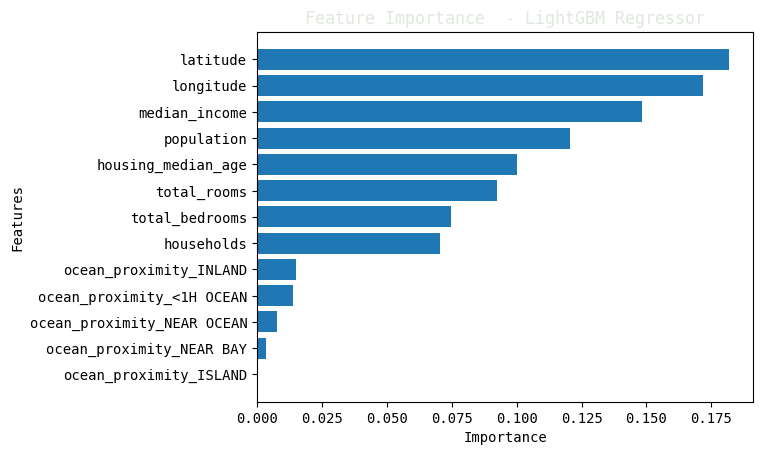

In [48]:
feature_importance = lgb.feature_importances_
feature_names = X.columns

feature_importance_normalized = feature_importance / feature_importance.sum()
sorted_indices = feature_importance_normalized.argsort()

sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = feature_importance_normalized[sorted_indices]

# Graficar en orden ascendente
plt.barh(sorted_feature_names, sorted_feature_importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance  - LightGBM Regressor')
plt.show()

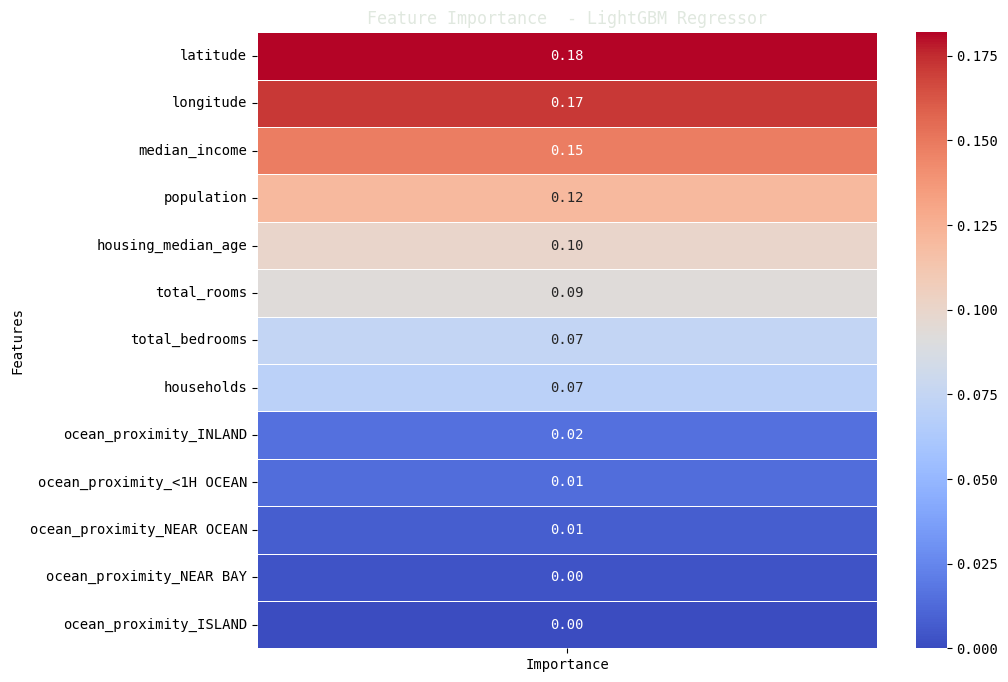

In [49]:
feature_importance_normalized_df = pd.DataFrame({'Features': feature_names, 'Importance': feature_importance_normalized})

# Ordenar por importancia en orden descendente
feature_importance_normalized_df = feature_importance_normalized_df.sort_values(by='Importance', ascending=False)

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(feature_importance_normalized_df.set_index('Features'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Importance  - LightGBM Regressor')
plt.show()

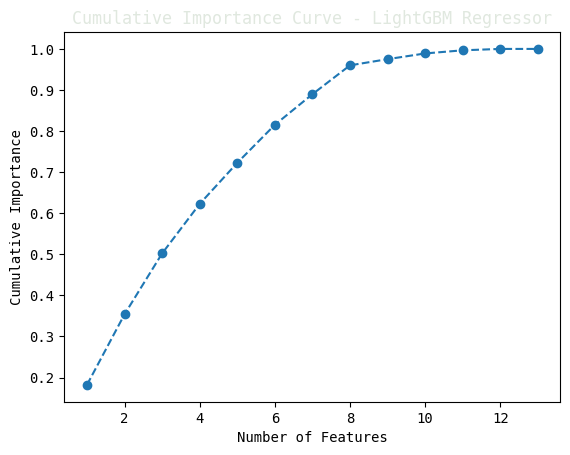

In [50]:
sorted_idx = np.argsort(feature_importance_normalized)[::-1]
cumulative_importance = np.cumsum(feature_importance_normalized[sorted_idx])

plt.plot(range(1, len(feature_names) + 1), cumulative_importance, marker='o', linestyle='--')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance Curve - LightGBM Regressor')
plt.show()